# Logistic regression


Most of the code below was generated, with some prompting, using Github copilot.

Some of the content here was guided by this [blog post](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc).

In [1]:
# create a tutorial to illustrate logistic regression using sklearn and the digits dataset
# import the necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import numpy as np


In [2]:
# load the digits dataset
digits = load_digits()

In [3]:
# how many digits are there?
print("There are {} digits in the dataset".format(len(digits.data)))

There are 1797 digits in the dataset


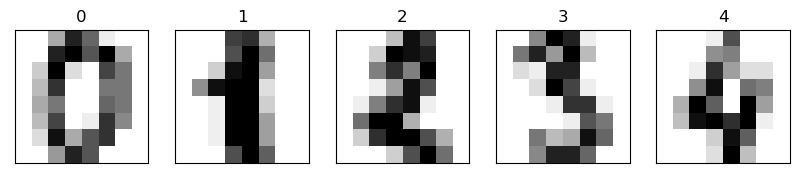

In [4]:
# show the first 5 digits as images
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.set_title("{}".format(digits.target[i]))

In [5]:
# print the first digit
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


Each digit is a 8x8 image of a hand-written digit, hence each digit is represented by an 8x8=64 length array. 

In this example, for digit 0, along the top you can see values 0,0,5, 13, 9, 1, 0, 0 indicating the two grid cell is white, the third is grey (5), the fourth is black (13), the fifth is grey (9) and so on.

Our task is to predict the labeled digit with a logistic regression model using as our X variables the 64 pixel values.

In [6]:
# split the digits data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

With this command we have asked the model to train on 75 percent of the model and then test on the remaining 25 percent.

q: Explain in words how logistic regression works
 
 a: Logistic regression is a classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [7]:
# train a logistic regression model on the training set. Set the max number of iterations to 1000
# to ensure convergence
model = LogisticRegression(solver='lbfgs', max_iter=10000)

In [8]:
# fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [9]:
# predict lebels for the test data
y_pred = model.predict(X_test)


In [10]:
# show data for the first 10 predicted digits and for first 10 test samples
print("Test data: {}".format(y_test[:10]))
print("Predicted: {}".format(y_pred[:10]))

Test data: [2 8 2 6 6 7 1 9 8 5]
Predicted: [2 8 2 6 6 7 1 9 8 5]


In [11]:
# q: is this the same as multinomial logistic regression?
# a: yes, it is. The digits dataset is a multiclass classification problem. The digits dataset has 10 classes

In [12]:
# use score method to get accuracy of model
score = model.score(X_test, y_test)
print(score)

0.9533333333333334


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



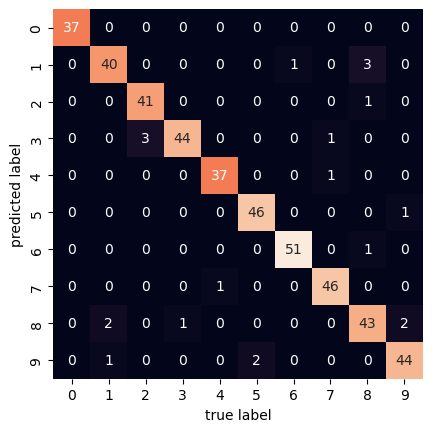

In [13]:
# show a confusion matrix and a classification report
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, y_pred))

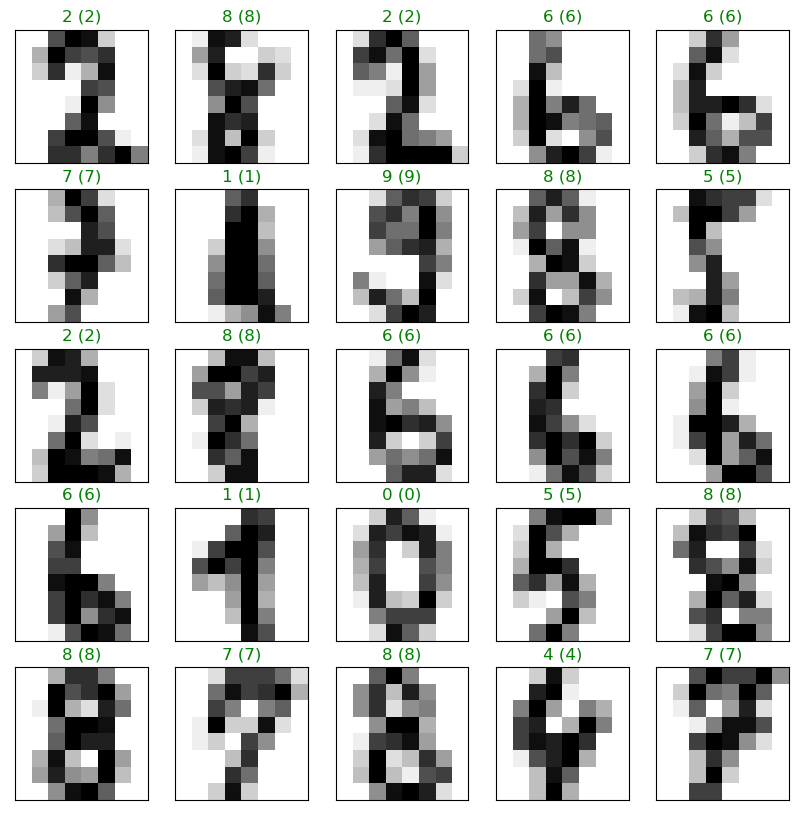

In [14]:
# show the first 25 test images, their predicted labels, and the true labels
fig = plt.figure(figsize=(10, 10))
for i in range(25):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.set_title("{} ({})".format(y_pred[i], y_test[i]),
                 color=("green" if (y_pred[i] == y_test[i]) else "red"))


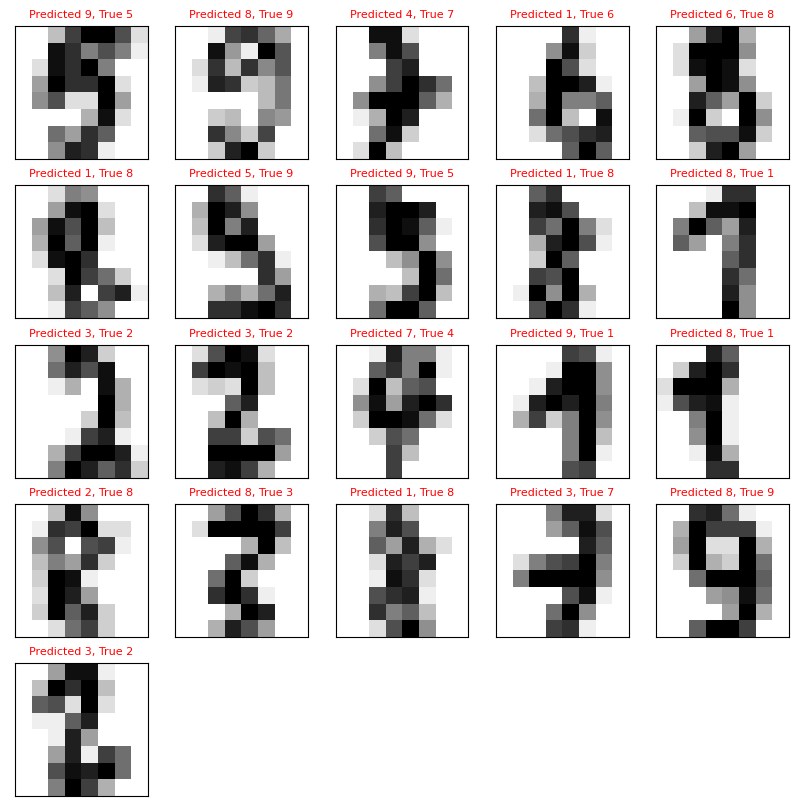

In [15]:
# display miscategorized images
fig = plt.figure(figsize=(10, 10))
for i, incorrect in enumerate(np.nonzero(y_pred != y_test)[0]):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[incorrect], cmap=plt.cm.binary, interpolation='nearest')
    ax.set_title("Predicted {}, True {}".format(y_pred[incorrect], y_test[incorrect]), color="red", fontsize=8)

In [16]:
# Use cross validation to evaluate the model
# show the mean accuracy of the model
scores = cross_validate(model, digits.data, digits.target, cv=5, return_train_score=True)
print("Mean accuracy: {}".format(scores['test_score'].mean()))


Mean accuracy: 0.9137604456824512


In [17]:
# q: explain what the cross_validate function just did
# a: it used 5-fold cross validation to evaluate the model. It returned the mean accuracy of the model

# q: What does the lower mean accuracy mean?
# a: it means that the model is overfitting the data. It is not generalizing well to new data
